# Pymaceuticals Inc.
---

### Analysis

- Analysis
 

In [1]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

#Data files
mouse_path = "data/Mouse_metadata.csv"
study_path = "data/Study_results.csv"

#Read the .csv files
mouse_metadata = pd.read_csv(mouse_path)
study_results = pd.read_csv(study_path)

#Merge the .csv files into one DataFrame
merged_df = pd.merge(study_results,mouse_metadata,how="left",on="Mouse ID")

#Display the first five rows of the DataFrame
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
#Count the number of unique mice
merged_df["Mouse ID"].nunique()

249

In [3]:
#Get unique Mouse IDs from rows where Mouse ID and Timepoint pairs are duplicated
dupes = merged_df[merged_df.duplicated(['Mouse ID','Timepoint'])]["Mouse ID"].unique()
dupes

array(['g989'], dtype=object)

In [4]:
#Display all data for the duplicate Mouse ID
dupes_df = merged_df.loc[merged_df["Mouse ID"].isin(dupes),:]
dupes_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
#Create new DataFrame by dropping all rows with the duplicate Mouse ID
clean_df = merged_df.drop(dupes_df.index)

#Display the first 5 rows of the new DataFrame
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
#Count the number of unique mice in the new DataFrame
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
#Group data by drug regimen
regimens = clean_df.groupby("Drug Regimen")

#Calculate summary statistics for the tumor volume
#mean, median, variance, standard deviation, standard error of means (SEM)
mean = regimens.mean()["Tumor Volume (mm3)"]
med = regimens.median()["Tumor Volume (mm3)"]
var = regimens.var()["Tumor Volume (mm3)"]
std = regimens.std()["Tumor Volume (mm3)"]
sem = regimens.sem()["Tumor Volume (mm3)"]

#Assemble the DataFrame
summary = pd.DataFrame({"Mean Tumor Volume":mean,
                        "Median Tumor Volume":med,
                        "Tumor Volume Variance":var,
                        "Tumor Volume Std. Dev.":std,
                        "Tumor Volume Std. Err.":sem})

#Display the DataFrame
summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
#Using aggregation, reproduce the same summary statistics DataFrame in a single line of code
aggregate_df = regimens.agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

# DataFrame caption styling
styles = [dict(selector="caption",props=[("text-align", "right")])]
summary_agg = aggregate_df.style.set_table_styles(styles)

#Display the captioned DataFrame
summary_agg

## Bar and Pie Charts

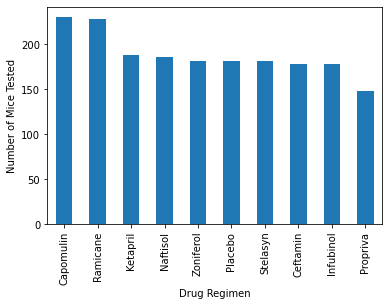

In [9]:
#Using Pandas, display a bar plot of total timepoints by drug regimen
bar_data = pd.DataFrame(regimens.count()["Timepoint"]).sort_values(["Timepoint","Drug Regimen"],ascending=[False,True])
pandas_bar_plot = bar_data.plot.bar(legend=False).set_ylabel("Number of Mice Tested")

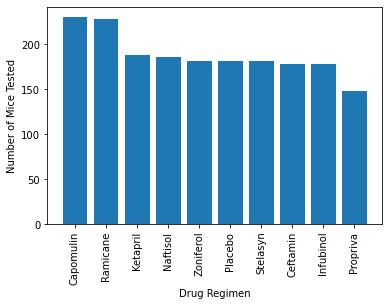

In [10]:
#Using pyplot, display a bar plot of total timepoints by drug regimen
plt.bar(bar_data.index.values,bar_data["Timepoint"])
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation=90)
plt.show()

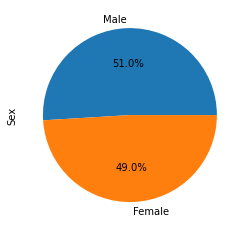

In [11]:
#Using Pandas, display a pie plot showing the distribution of female mice versus male mice
males = clean_df.loc[clean_df["Sex"]=="Male"].count()["Mouse ID"]
females = clean_df.loc[clean_df["Sex"]=="Female"].count()["Mouse ID"]
sex_df = pd.DataFrame({"Category":["Male","Female"],"Sex":[males,females]}).set_index("Category")
sex_plot = sex_df.plot.pie(y="Sex",autopct="%1.1f%%",legend=False)


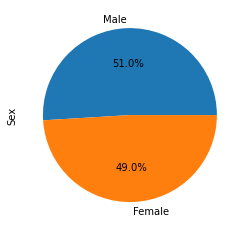

In [12]:
#Using pyplot, display a pie plot showing the distribution of female mice versus male mice
counts = [males,females]
labels = ["Male","Female"]
plt.pie(counts,autopct="%1.1f%%",labels=labels)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
#Grouping by drug regimen, get the max timepoint for each mouse
max_timepoint_df = pd.DataFrame(clean_df.groupby(["Drug Regimen","Mouse ID"]).max()["Timepoint"])

#Merge with cleaned DataFrame to get the tumor volume at the max timepoint
vol_df = pd.merge(max_timepoint_df,clean_df,on=["Drug Regimen","Mouse ID","Timepoint"],how="left")

In [14]:
#Create a list of the four specified drugs
drugs = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

#Generate "list of lists" of tumor volumes for each drug in list of drugs
tumor_volumes = [list(vol_df.loc[vol_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"]) for drug in drugs]

#Generate "list of DataFrames" of tumor volumes for each drug in list of drugs
tumor_volumes_dfs = [vol_df.loc[vol_df["Drug Regimen"]==drug][["Tumor Volume (mm3)"]] for drug in drugs]

#Quartiles
quartiles = [tumor_volumes_dfs[index].quantile([.25,.5,.75]) for index in range(0,len(tumor_volumes_dfs))]
lowerqs = [quartile.loc[0.25,"Tumor Volume (mm3)"] for quartile in quartiles]
upperqs = [quartile.loc[0.75,"Tumor Volume (mm3)"] for quartile in quartiles]

#IQRs
iqrs = [upperqs[index]-lowerqs[index] for index in range(0,len(upperqs))]

#Upper and lower bounds
upper_bounds = [upperqs[index] + (1.5*iqrs[index]) for index in range(0,len(lowerqs))]
lower_bounds = [lowerqs[index] - (1.5*iqrs[index]) for index in range(0,len(lowerqs))]

cap_outs = []
ram_outs = []
inf_outs = []
cef_outs = []

for x in tumor_volumes[0]:
    if (x > upper_bounds[0]) or (x < lower_bounds[0]):
        cap_outs.append(x)
for x in tumor_volumes[1]:
    if (x > upper_bounds[1]) or (x < lower_bounds[1]):
        ram_outs.append(x)
for x in tumor_volumes[2]:
    if (x > upper_bounds[2]) or (x < lower_bounds[2]):
        inf_outs.append(x)
for x in tumor_volumes[3]:
    if (x > upper_bounds[3]) or (x < lower_bounds[3]):
        cef_outs.append(x)
# ram_out
# inf_out
# cef_out
# upper_bounds = upperqs + (1.5*iqrs)
# quartiles[0].loc[0.25]
print(cap_outs)
print(ram_outs)
print(inf_outs)
print(cef_outs)

[]
[]
[36.321345799999996]
[]


In [15]:
print(lower_bounds)
print(upper_bounds)
# df.loc[value] for key, value in df.groupby("name").groups.items()

[20.70456164999999, 17.912664470000003, 36.83290494999999, 25.355449580000002]
[51.83201549, 54.30681135, 82.74144559000001, 87.66645829999999]


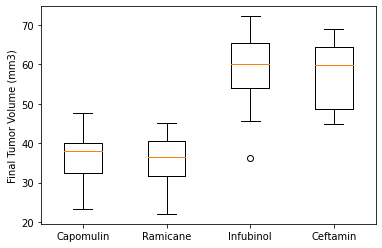

In [16]:
#Display the box plot
fig, ax = plt.subplots()
ax.boxplot(tumor_volumes, labels=drugs)
ax.set_ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

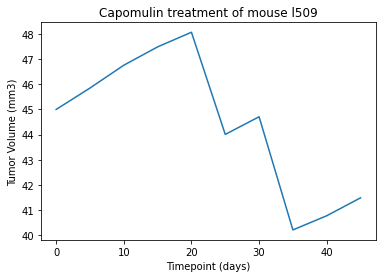

In [17]:
#Filter clean DataFrame for Capomulin and mouse l509
line = clean_df.loc[(clean_df["Drug Regimen"]=="Capomulin")&(clean_df["Mouse ID"]=="l509")]

#Display the line plot
plt.plot(line["Timepoint"],line["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

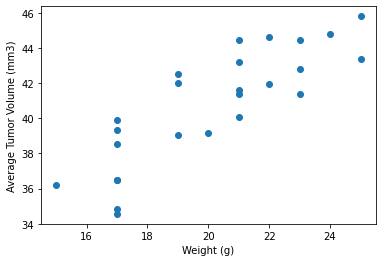

In [18]:
#Filter clean DataFrame for Capomulin
df1 = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin",:].groupby("Mouse ID").mean()

#Display the scatter plot
plt.scatter(df1["Weight (g)"],df1["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression